In [67]:
import sys
sys.path.append('../../')
from coco_captions import COCOCaptionsPlots
from config import COCO_CAPTIONS_PATH
import matplotlib.pyplot as plt
import textwrap
import torch

In [68]:
indices = torch.randint(0, 1000, (5,))
indices

tensor([505, 840, 261, 176, 420])

In [69]:
mask_args = {}

coco_cap = COCOCaptionsPlots(
    root=COCO_CAPTIONS_PATH,
    split='train',
    input_size=224,
    local_cache_path=None,
    key='imgs',
    beit_transforms=False,
    no_transform=True, # no transform for reference!
    compute_mask=None,
    **mask_args,
    )

2024-03-12 17:04:35 | INFO | coco_captions | initial transform: Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True), source transform: None, final transform: Compose(
    ToTensor()
    Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
)
2024-03-12 17:04:35 | INFO | coco_captions | loaded 113287 examples


In [70]:
reference_image_list = [coco_cap[i]['imgs'] for i in indices]

In [77]:
mask_args = {}

coco_cap = COCOCaptionsPlots(
    root=COCO_CAPTIONS_PATH,
    split='train',
    input_size=224,
    local_cache_path=None,
    key='imgs',
    beit_transforms=False,
    no_transform=False,
    compute_mask=None,
    crop_scale=(0.2, 1.0), # default value for no beit transform!
    **mask_args,
    )

2024-03-12 17:05:53 | INFO | coco_captions | initial transform: Compose(
    ColorJitter(brightness=(0.6, 1.4), contrast=(0.6, 1.4), saturation=(0.6, 1.4), hue=None)
    RandomHorizontalFlip(p=0.5)
), source transform: None, final transform: Compose(
    ToTensor()
    Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
)
2024-03-12 17:05:53 | INFO | coco_captions | loaded 113287 examples


In [78]:
image_list = []
row_labels = []
for i in indices:
    example_list = []
    for _ in range(5):
        example_list.append(coco_cap[i]['imgs'])
    image_list.append(example_list)
    row_labels.append(coco_cap[i]['target'])

2024-03-12 17:06:03 | WARNING | matplotlib.image | Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
2024-03-12 17:06:03 | WARNING | matplotlib.image | Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
2024-03-12 17:06:03 | WARNING | matplotlib.image | Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
2024-03-12 17:06:03 | WARNING | matplotlib.image | Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
2024-03-12 17:06:03 | WARNING | matplotlib.image | Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
2024-03-12 17:06:03 | WARNING | matplotlib.image | Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
2024-03-12 17:06:03 | WARNING | ma

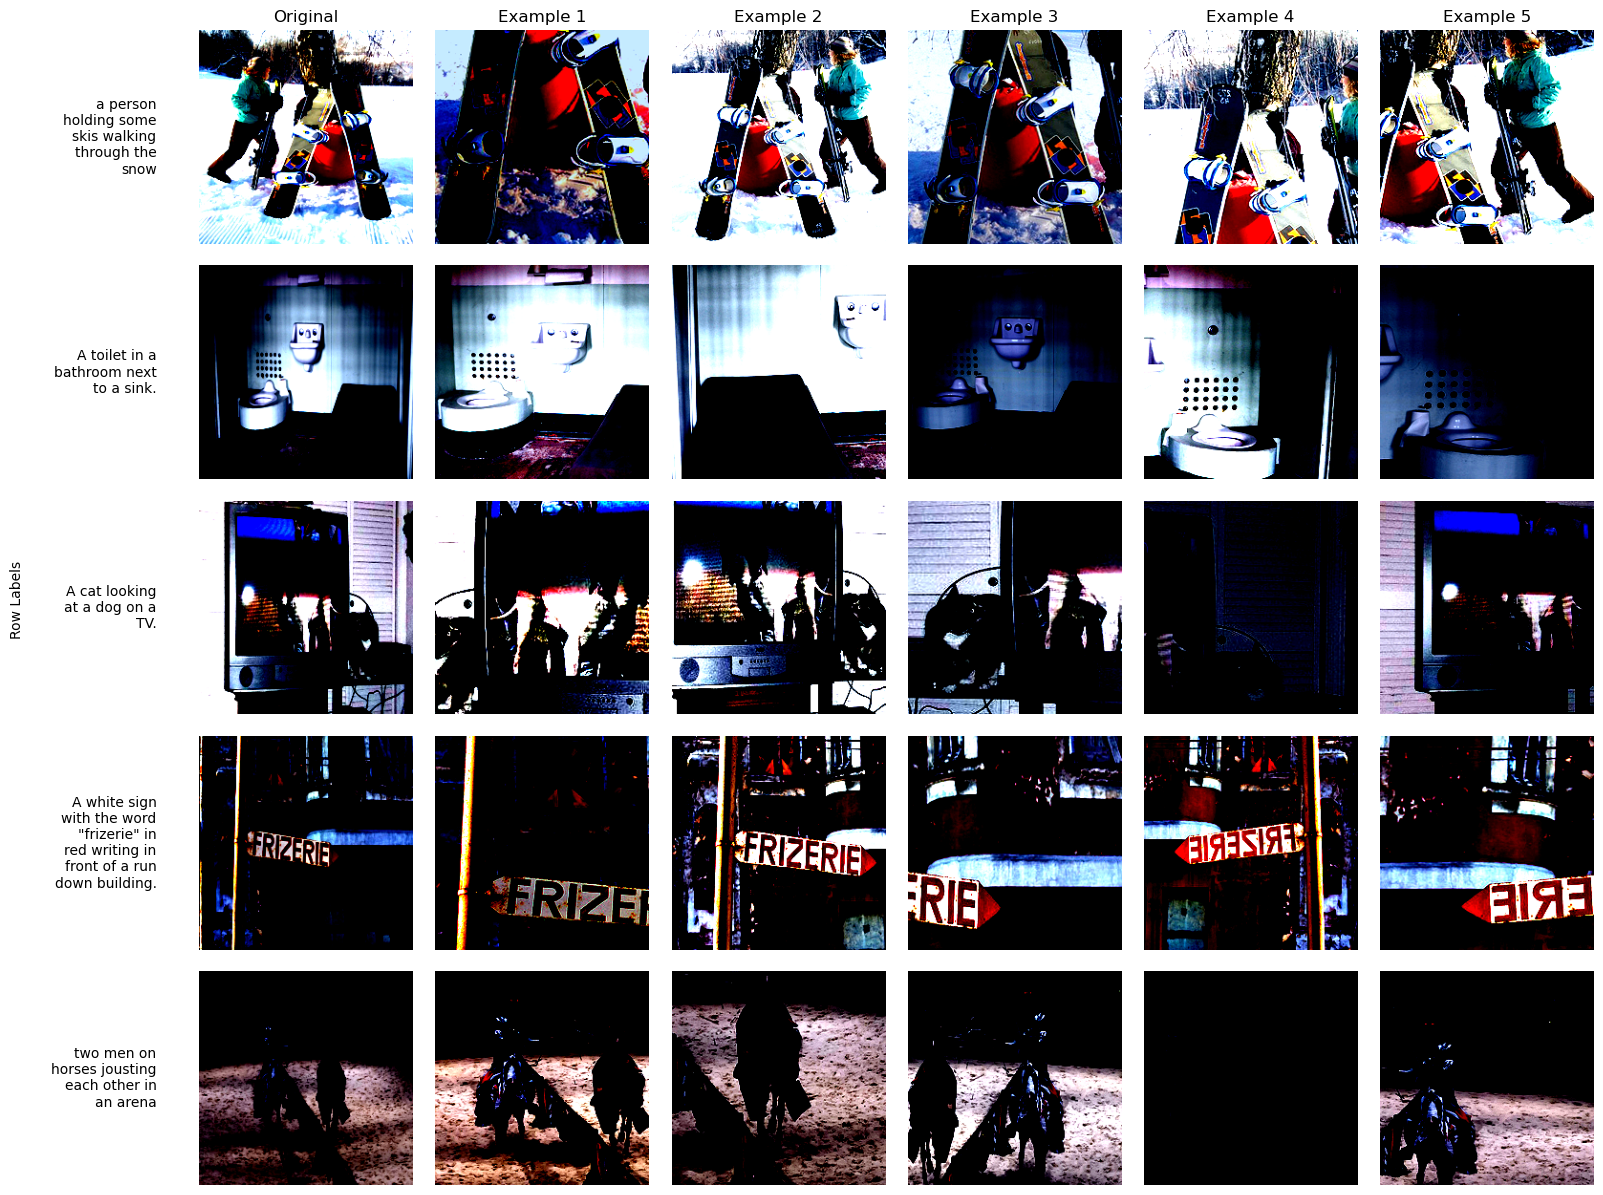

In [79]:
# Set the number of images per row and number of rows
images_per_row = 6  # Increase the number of images per row by 1
num_rows = 5

# Create a figure and axes
fig, axes = plt.subplots(num_rows, images_per_row, figsize=(18, 15))  # Increase the figure size

# Add titles to each column
axes[0, 0].set_title("Original")  # Title for the first column
for j in range(1, images_per_row):
    axes[0, j].set_title(f"Example {j}")

# Add text on the left side for each row
wrapped_labels = [textwrap.fill(label, 15) for label in row_labels]  # Wrap the text

for i, label in enumerate(wrapped_labels):
    axes[i, 0].text(-0.2, 0.5, label, transform=axes[i, 0].transAxes, va='center', ha='right')

# Add a central title over the other 5 columns
# fig.suptitle("Image Gallery", fontsize=16, y=0.92)

# Add a title over the row labels
fig.text(0.02, 0.5, "Row Labels", va='center', rotation='vertical')

# Iterate over the axes and plot the images
for i in range(num_rows):
    axes[i, 0].imshow(reference_image_list[i].permute(1, 2, 0))
    axes[i, 0].axis('off')

    for j in range(1, images_per_row):  # Start from the second column
        axes[i, j].imshow(image_list[i][j-1].permute(1, 2, 0))
        axes[i, j].axis('off')

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.1, hspace=0.1)

# Show the plot
plt.show()

In [74]:
mask_args = {}

coco_cap = COCOCaptionsPlots(
    root=COCO_CAPTIONS_PATH,
    split='train',
    input_size=224,
    local_cache_path=None,
    key='imgs',
    beit_transforms=False,
    no_transform=False,
    compute_mask=None,
    crop_scale=(0.6, 1.0), # better!
    **mask_args,
    )

2024-03-12 17:04:44 | INFO | coco_captions | initial transform: Compose(
    RandomResizedCrop(size=(224, 224), scale=(0.6, 1.0), ratio=(0.75, 1.3333), interpolation=bicubic, antialias=True)
    RandomHorizontalFlip(p=0.5)
), source transform: None, final transform: Compose(
    ToTensor()
    Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
)
2024-03-12 17:04:44 | INFO | coco_captions | loaded 113287 examples


In [75]:
image_list = []
row_labels = []
for i in indices:
    example_list = []
    for _ in range(5):
        example_list.append(coco_cap[i]['imgs'])
    image_list.append(example_list)
    row_labels.append(coco_cap[i]['target'])

2024-03-12 17:04:44 | WARNING | matplotlib.image | Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
2024-03-12 17:04:44 | WARNING | matplotlib.image | Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
2024-03-12 17:04:44 | WARNING | matplotlib.image | Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
2024-03-12 17:04:44 | WARNING | matplotlib.image | Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
2024-03-12 17:04:44 | WARNING | matplotlib.image | Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
2024-03-12 17:04:44 | WARNING | matplotlib.image | Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
2024-03-12 17:04:44 | WARNING | ma

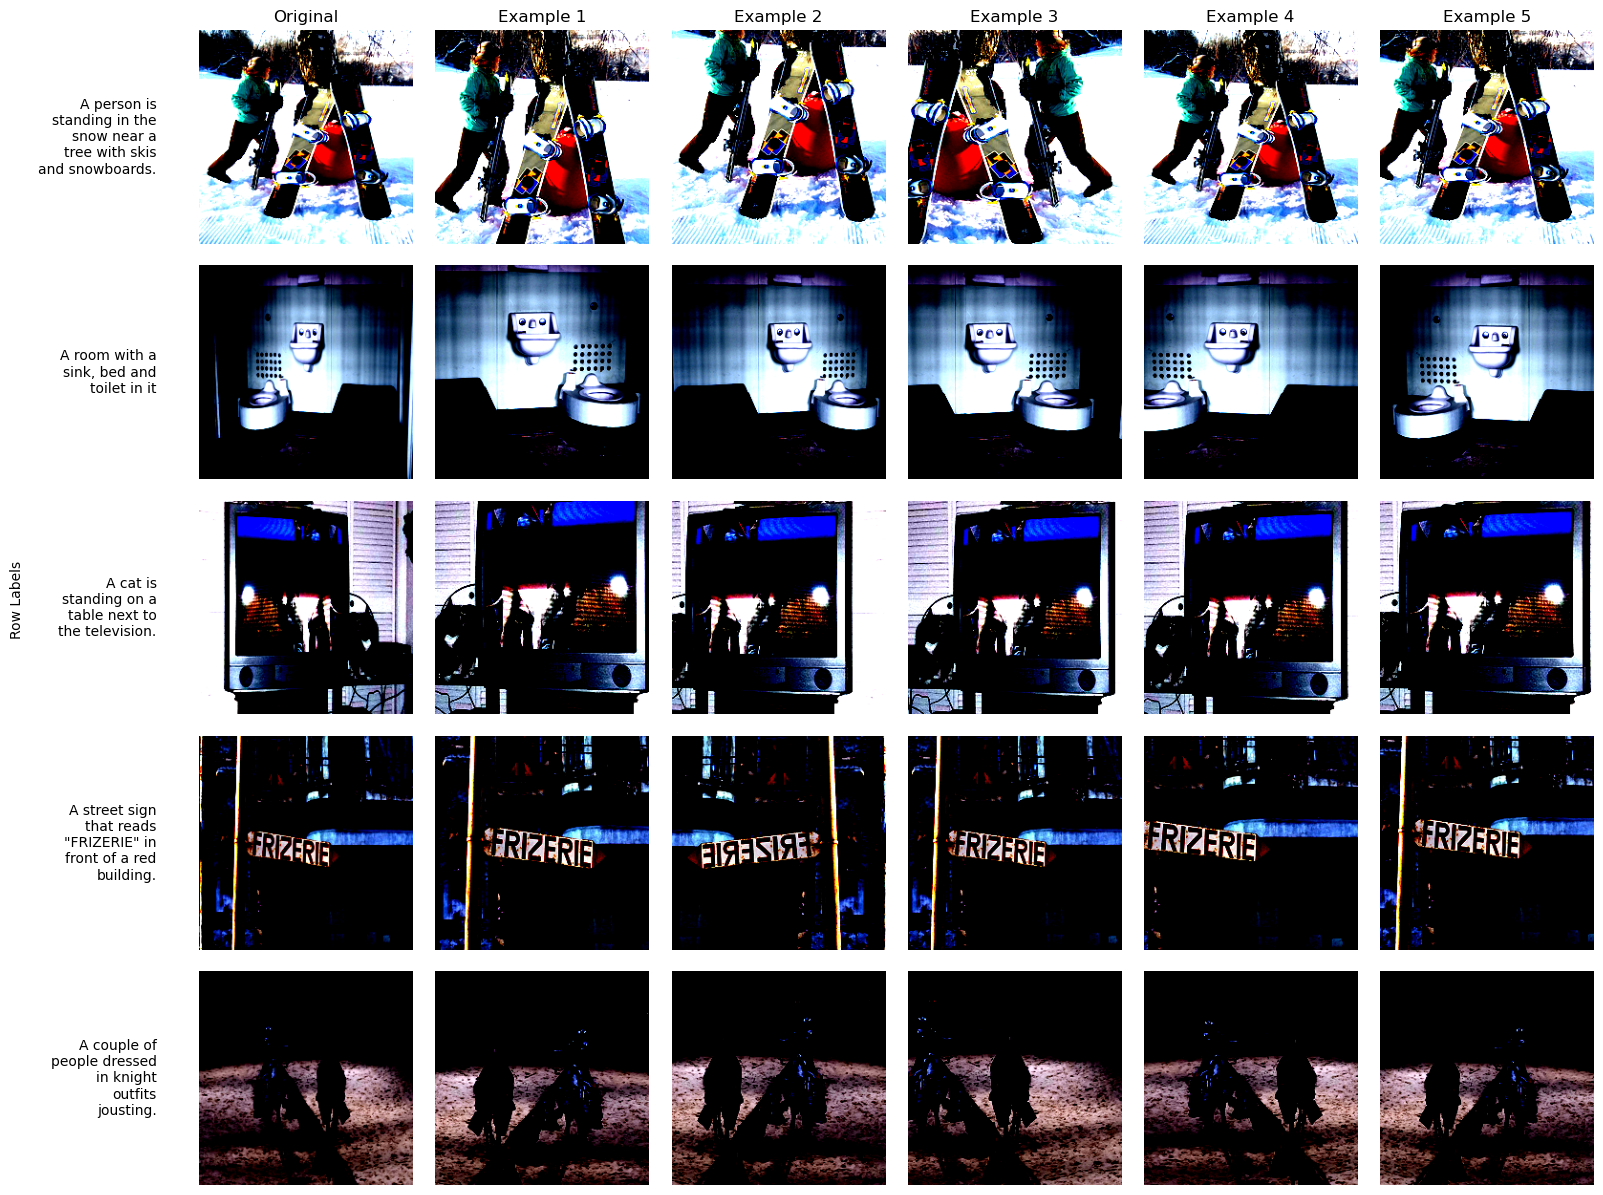

In [76]:
# Set the number of images per row and number of rows
images_per_row = 6  # Increase the number of images per row by 1
num_rows = 5

# Create a figure and axes
fig, axes = plt.subplots(num_rows, images_per_row, figsize=(18, 15))  # Increase the figure size

# Add titles to each column
axes[0, 0].set_title("Original")  # Title for the first column
for j in range(1, images_per_row):
    axes[0, j].set_title(f"Example {j}")

# Add text on the left side for each row
wrapped_labels = [textwrap.fill(label, 15) for label in row_labels]  # Wrap the text

for i, label in enumerate(wrapped_labels):
    axes[i, 0].text(-0.2, 0.5, label, transform=axes[i, 0].transAxes, va='center', ha='right')

# Add a central title over the other 5 columns
# fig.suptitle("Image Gallery", fontsize=16, y=0.92)

# Add a title over the row labels
fig.text(0.02, 0.5, "Row Labels", va='center', rotation='vertical')

# Iterate over the axes and plot the images
for i in range(num_rows):
    axes[i, 0].imshow(reference_image_list[i].permute(1, 2, 0))
    axes[i, 0].axis('off')

    for j in range(1, images_per_row):  # Start from the second column
        axes[i, j].imshow(image_list[i][j-1].permute(1, 2, 0))
        axes[i, j].axis('off')

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.1, hspace=0.1)

# Show the plot
plt.show()